In [18]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st

In [3]:
col_names = ['bonafide_or_spoof','set','language','singer','title','url','views','likes','comments','user_id','username','subscribers','num_channels','sample_width','frame_rate','num_frames','audio_time','avg_zero_cross_rate','avg_rms','avg_spect_cent','avg_tempo','avg_db_inten','avg_flatness','avg_contrast','avg_harmonic_ratio']

pdata = pd.read_csv('singfake_bilibili_audio_features.csv', skiprows=1, names=col_names)

pdata.head(10)

,bonafide_or_spoof,set,language,singer,title,url,views,likes,comments,user_id,...,num_frames,audio_time,avg_zero_cross_rate,avg_rms,avg_spect_cent,avg_tempo,avg_db_inten,avg_flatness,avg_contrast,avg_harmonic_ratio
0,0,Validation,Spanish,G.E.M.,【4K超清 | 官方MV】邓紫棋《Un Momento》西语版 | Revelación｜G...,https://www.bilibili.com/video/BV1HP411y7mb/?s...,51899,4596,140,1.889545e+09,...,11433984,238.208000,0.056634,0.201527,1490.786332,151.999081,-54.358418,0.021109,26.612757,-1.720000e-05
1,0,T01,Mandarin,Stefanie_Sun,孙燕姿.[爱情证书].MV.官方字幕修复版 1080p,https://www.bilibili.com/video/BV1nb4y1U7Jj/?s...,31540,392,53,3.848313e+08,...,11326464,256.835918,0.079587,0.173337,1991.927239,123.046875,-45.372272,0.026083,25.385115,4.440000e-07
2,0,Training,Mandarin,Mao_Buyi,【毛不易】毛不易精选歌曲合集（带歌词 分集播放）《消愁》《像我这样的人》《平凡的一天》,https://www.bilibili.com/video/BV11M411n7TC/?s...,938489,7578,222,3.493120e+15,...,7575552,171.781225,0.081156,0.087923,1894.589182,123.046875,-49.199482,0.012826,24.683180,-2.440000e-08
3,0,T02,Mandarin,Li_Jian,李健-贝加尔湖畔 (《无心法师》网络剧插曲)(蓝光),https://www.bilibili.com/video/BV1GS4y1Y7u7?p=...,24157,476,23,3.591141e+07,...,10289152,233.314104,0.073901,0.078857,1848.049073,123.046875,-52.704056,0.006847,26.024776,-1.210000e-06
4,0,Training,Mandarin,Hebe_Tien,田馥甄《演员》,https://www.bilibili.com/video/BV1ts411a7m1/?s...,173701,961,206,7.149378e+07,...,12132352,275.110023,0.075524,0.079169,1845.319544,184.570312,-42.717655,0.009434,23.940943,-1.190000e-05
5,0,Training,Mandarin,Hebe_Tien,懸日,https://www.bilibili.com/video/BV1ja4y147Wr?p=20,12402,92,4,3.870518e+08,...,11736064,266.123900,0.056561,0.074131,1384.318999,161.499023,-54.003551,0.008710,25.450700,9.360000e-07
6,0,Training,Mandarin,Stefanie_Sun,天使的指纹-孙燕姿,https://www.bilibili.com/video/BV1J841177n3?p=...,3335891,28129,1038,3.585944e+08,...,9394176,213.019864,0.062797,0.153191,1620.525750,129.199219,-51.298046,0.007306,26.982263,-2.470000e-06
7,0,Training,Japanese,Kenshi_Yonezu,クランベリーとパンケーキ,https://www.bilibili.com/video/BV12R4y1A75y?p=12,79299,1223,36,4.183923e+08,...,9290752,210.674648,0.070855,0.307621,1989.785201,86.132812,-39.818172,0.019373,22.436281,2.010000e-07
8,0,T01,Mandarin,Stefanie_Sun,银泰-孙燕姿,https://www.bilibili.com/video/BV1J841177n3?p=...,3335972,28129,1038,3.585944e+08,...,9336832,211.719547,0.052835,0.123037,1273.097371,151.999081,-54.227051,0.003310,27.618330,-6.120000e-07
9,0,Validation,Mandarin,The_Landlord's_Cat,房东的猫翻唱鹿先森乐队歌曲《春风十里》，真是好听啊！,https://www.bilibili.com/video/BV1jf4y1B758/?s...,1116699,11527,225,3.544964e+08,...,12379136,280.706032,0.051493,0.089944,1282.568374,135.999178,-59.832489,0.023732,27.167621,-7.660000e-08


In [4]:
print(pdata.dtypes)

bonafide_or_spoof        int64
set                     object
language                object
singer                  object
title                   object
url                     object
views                    int64
likes                    int64
comments                 int64
user_id                float64
username                object
subscribers              int64
num_channels             int64
sample_width             int64
frame_rate               int64
num_frames               int64
audio_time             float64
avg_zero_cross_rate    float64
avg_rms                float64
avg_spect_cent         float64
avg_tempo              float64
avg_db_inten           float64
avg_flatness           float64
avg_contrast           float64
avg_harmonic_ratio     float64
dtype: object


In [5]:
feat_col = ['views','likes','comments','subscribers','frame_rate','num_frames','audio_time','avg_zero_cross_rate','avg_rms','avg_spect_cent','avg_tempo','avg_db_inten','avg_flatness','avg_contrast','avg_harmonic_ratio']

X = pdata[feat_col]
y = pdata.bonafide_or_spoof


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [7]:
print(len(X_train))
print(len(y_train))

30
30


In [8]:
print(y_train)

26    0
16    0
24    0
55    1
11    0
32    1
53    1
41    1
37    1
29    0
44    1
1     0
21    0
2     0
47    1
39    1
35    1
23    0
49    1
10    0
22    0
18    0
59    1
20    0
7     0
42    1
14    0
28    0
51    1
38    1
Name: bonafide_or_spoof, dtype: int64


In [9]:
print(X_train)

      views   likes  comments  subscribers  frame_rate  num_frames  \
26    79299    1223        36        79871       44100    12108800   
16    79299    1223        36        79871       44100    10540032   
24   863954    8058       205          974       44100    12448768   
55    23568     262        59         5806       44100    12986368   
11    56464     579        28        43680       48000    15316992   
32     5861     144        30         9347       44100    14075904   
53     2132      35         8          576       44100    10414080   
41      469       9         0          576       44100    10626048   
37   207752    6403       320         1226       44100    10639360   
29   107807    4425       249      1504507       48000    13417472   
44   321147    7996       412       127753       48000    12093440   
1     31540     392        53         3373       44100    11326464   
21     8327     157        45         3945       44100    11446272   
2    938489    7578 

In [52]:
model1 = LogisticRegression(max_iter=1000,random_state=42,solver='liblinear')
model2 = GaussianNB()
model3 = MLPClassifier(max_iter=1000, random_state=42)
model4 =  GradientBoostingClassifier(max_depth=3,random_state=42)

In [53]:
model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)
model4.fit(X_train,y_train)

GradientBoostingClassifier(random_state=42)

In [54]:
pred1=model1.predict(X_test)
pred2=model2.predict(X_test)
pred3=model3.predict(X_test)
pred4=model4.predict(X_test)

In [55]:
final_pred = np.array([])
for i in range(0,len(X_test)):
    final_pred = np.append(final_pred, st.mode([pred1[i], pred2[i], pred3[i],pred4[i]]))
print(final_pred)

[0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1.
 0. 0. 0. 0. 0. 1.]


In [56]:
accuracy = accuracy_score(y_test, final_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, final_pred))

Accuracy: 0.8
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        14
           1       0.81      0.81      0.81        16

    accuracy                           0.80        30
   macro avg       0.80      0.80      0.80        30
weighted avg       0.80      0.80      0.80        30



In [57]:
cnf_matrix = metrics.confusion_matrix(y_test, final_pred)
cnf_matrix 

array([[11,  3],
       [ 3, 13]])

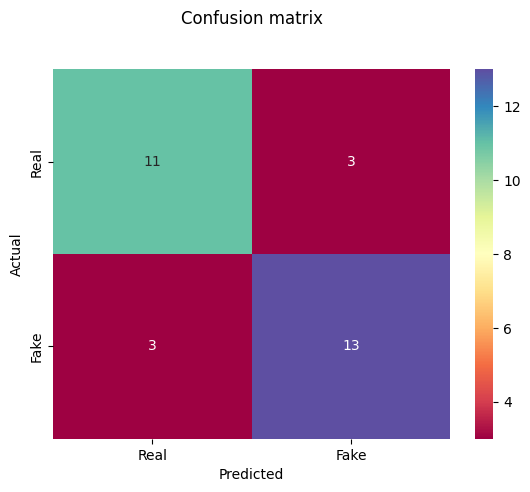

In [58]:
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap=sns.color_palette("Spectral", as_cmap=True) ,fmt='g',xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.title('Confusion matrix', y=1.1) #Sets the title, location and distance
plt.ylabel('Actual') #Labels the Y axis as Actual
plt.xlabel('Predicted') #Labels the X axis as Predicted
plt.show()

In [59]:
pred_proba1 = model1.predict_proba(X_test)[::,1]
pred_proba2 = model2.predict_proba(X_test)[::,1]
pred_proba3 = model3.predict_proba(X_test)[::,1]
pred_proba4 = model4.predict_proba(X_test)[::,1]

In [60]:
final_pred_proba = np.array([])
for i in range(0,len(X_test)):
    final_pred_proba = np.append(final_pred_proba, st.mode([pred_proba1[i], pred_proba2[i], pred_proba3[i],pred_proba4[i]]))

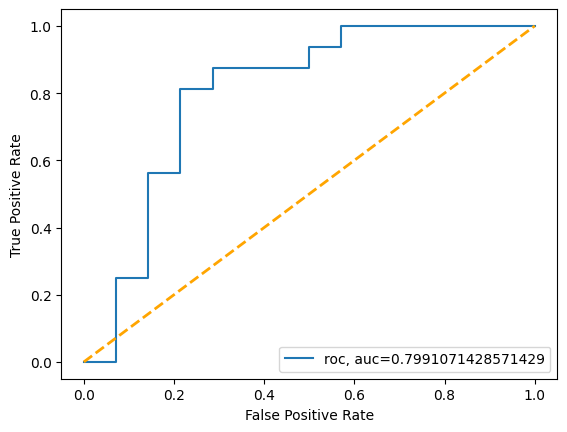

In [61]:
falseposrate, trueposrate, _ = metrics.roc_curve(y_test,  final_pred_proba) #Gets the false positive rate and true positive rate
auc = metrics.roc_auc_score(y_test, final_pred_proba) #Calculates AUC scaore
plt.plot(falseposrate,trueposrate,label="roc, auc="+str(auc)) #Plots the false postive rate and true positive rate
plt.plot([0, 1], [0, 1], color='orange', lw=2, linestyle='--')#Shows diagonal line 
plt.legend(loc=4) #Sets location of the legend
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()